In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.nn import functional as F
import matplotlib.pyplot as plt
from statistics import mean

In [0]:
# Hyper Parameters 
input_size = 784
inter = 56
num_classes = 10
num_epochs = 8
batch_size = 100
learning_rate = 0.01
momentum = 0.5

In [0]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./files', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./files', 
                           train=False, 
                           transform=transforms.ToTensor(),
                           download=True)

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [81]:
print(len(train_dataset))
print(len(test_dataset))

60000
10000


In [0]:
# GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## MODEL

In [0]:
class MLP1linear(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP1linear, self).__init__()
        self.fc1 = nn.Linear(input_size, inter)
        self.fc2 = nn.Linear(inter, num_classes)
    
    def forward(self, x):
        out = self.fc2(self.fc1(x))
        return out
      
class MLP1relu(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP1relu, self).__init__()
        self.fc1 = nn.Linear(input_size, inter)
        self.fc2 = nn.Linear(inter, num_classes)
    
    def forward(self, x):
        out = self.fc2(F.relu(self.fc1(x)))
        return out

class MLP1relu2(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP1relu2, self).__init__()
        self.fc1 = nn.Linear(input_size, inter)    
        self.dropper = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(inter, num_classes)
    
    def forward(self, x):
        out = self.fc2(self.dropper(F.relu(self.fc1(x))))
        return out

      
class MLP1relu3(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP1relu3, self).__init__()
        self.fc1 = nn.Linear(input_size, inter)    
        self.dropper = nn.Dropout(p=0.3)
        self.fc2 = nn.Linear(inter, num_classes)
    
    def forward(self, x):
        out = self.fc2(self.dropper(F.relu(self.fc1(x))))
        return out
      

class MLP1relu5(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP1relu5, self).__init__()
        self.fc1 = nn.Linear(input_size, inter)    
        self.dropper = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(inter, num_classes)
    
    def forward(self, x):
        out = self.fc2(self.dropper(F.relu(self.fc1(x))))
        return out
      
class MLP1tanh(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP1tanh, self).__init__()
        self.fc1 = nn.Linear(input_size, inter)
        self.fc2 = nn.Linear(inter, num_classes)
    
    def forward(self, x):
        out = self.fc2(F.tanh(self.fc1(x)))
        return out
      
class MLP1sig(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP1tanh, self).__init__()
        self.fc1 = nn.Linear(input_size, inter)
        self.fc2 = nn.Linear(inter, num_classes)
    
    def forward(self, x):
        out = self.fc2(F.sigmoid(self.fc1(x)))
        return out

      
class MLP2linear(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP2linear, self).__init__()
        self.fc1 = nn.Linear(input_size, 300)
        self.fc2 = nn.Linear(300, inter)
        self.fc3 = nn.Linear(inter, num_classes)
    

    def forward(self, x):
        out = self.fc3(self.fc2(self.fc1(x)))
        return out

class MLP3linear(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP2linear, self).__init__()
        self.fc1 = nn.Linear(input_size, 300)
        self.fc2 = nn.Linear(300, inter)
        self.fc3 = nn.Linear(inter, num_classes)

    def forward(self, x):
        out = self.fc4(self.fc3(self.fc2(self.fc1(x))))
        return out


In [0]:

def test(test_loader,device,model,criterion):
  correct = 0
  total = 0
  test_loss = []
  for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)
      images = Variable(images.view(-1, 28*28))
      outputs = model(images)
      loss = criterion(outputs, labels)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum()
      test_loss.append(loss.item())
  
  return (int( (100 * correct / total))),mean(test_loss)
      


def runner(input_size, inter, num_classes, filename,train_loader, test_loader,learning_rate,device,num_epochs,momentum,model_class,criterion):
  model = model_class(input_size, inter, num_classes)
  model.to(device)
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
  training_losses = []
  accuracy = []
  test_loss = []
  accuracy_test = []
  for epoch in range(num_epochs):
      print(epoch,num_epochs)
      correct = 0
      train_loss = []
      total = 0
      for i, (images, labels) in enumerate(train_loader):
          images = images.to(device)
          labels = labels.to(device)
          images = Variable(images.view(-1, 28*28))
          labels = Variable(labels)
          optimizer.zero_grad()
          outputs = model(images)
          loss = criterion(outputs, labels)
          total += labels.size(0)
          _, predicted = torch.max(outputs.data, 1)
          correct += (predicted==labels).sum()
          loss.backward()
          optimizer.step()
          train_loss.append(loss.item())
      acc, lo = test(test_loader,device,model,criterion)
      test_loss.append(lo)
      training_losses.append(mean(train_loss))
      accuracy_test.append(acc)
      accuracy.append(int( (100 * correct / total)))
      

#   accuracy = int( (100 * correct / total))
  fig = plt.figure()
  plt.plot(range(len(training_losses)+1)[1:], training_losses,label='Train')
  plt.plot(range(len(test_loss)+1)[1:], test_loss,label='Test')
  plt.title('Loss vs Epoch - ' + str(filename))
  plt.xlabel('Epochs')
  plt.legend()
  plt.ylabel('Loss')
  plt.savefig(str(filename) + ' loss vs epoch.png')
  plt.clf()
  fig = plt.figure()
  plt.plot(range(len(accuracy)+1)[1:], accuracy,label='Train')
  plt.plot(range(len(accuracy_test)+1)[1:], accuracy_test,label='Test')
  plt.title('Accuracy vs Epoch - ' + str(filename))
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.savefig(str(filename) + ' accuracy vs epoch.png')
  return [accuracy_test,test_loss]

def plot_losses(losses,title,loa=1):
  # loa == loss or accuracy
  ylabel = 'Accuracy'
  if loa == 2:
    ylabel = 'Loss'
  
  fig = plt.figure()
  for _loss in losses:
    loss = _loss[loa]
    label = _loss[0]
    plt.plot(range(len(loss)+1)[1:], loss,label=label)
  plt.title(title)
  plt.xlabel('Epochs')
  plt.ylabel(ylabel)
  plt.legend()
  plt.savefig(title+'.png')
  

0 8
1 8
2 8
3 8
4 8
5 8
6 8
7 8
0 8
1 8
2 8
3 8
4 8
5 8
6 8
7 8


<Figure size 432x288 with 0 Axes>

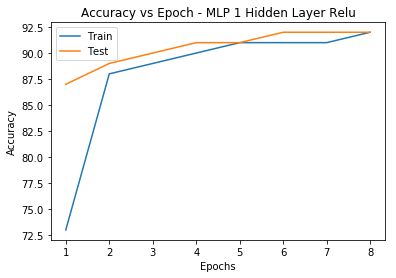

<Figure size 432x288 with 0 Axes>

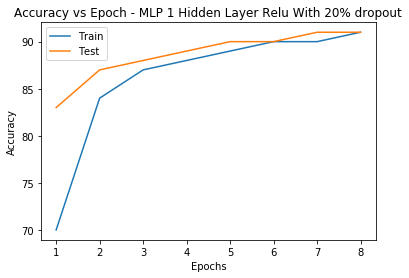

In [85]:
layers = []
activation = []
dropouts = []

filename = 'MLP 1 Hidden Layer Relu'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,MLP1relu,nn.CrossEntropyLoss())
dropouts.append(z)
# layers.append(z)

filename = 'MLP 1 Hidden Layer Relu With 20% dropout'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,MLP1relu2,nn.CrossEntropyLoss())
dropouts.append(z)

filename = 'MLP 1 Hidden Layer Relu With 30% dropout'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,MLP1relu2,nn.CrossEntropyLoss())
dropouts.append(z)

filename = 'MLP 1 Hidden Layer Relu With 50% dropout'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,MLP1relu5,nn.CrossEntropyLoss())
dropouts.append(z)

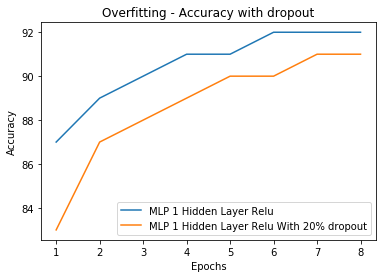

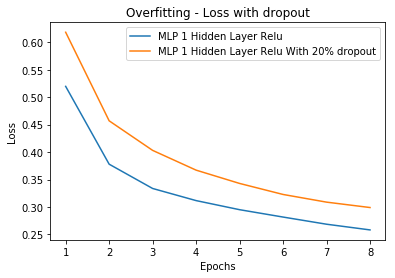

In [87]:
# plot_losses(activation,'Multi Layer Perceptron - Activation Functions')
# plot_losses(layers,'Multi Layer Perceptron - Different Layers')
# print(activation)
plot_losses(activation,'Overfitting - Accuracy with dropout')
plot_losses(activation,'Overfitting - Loss with dropout',loa=2)

In [89]:
try:
  from google.colab import files
  !zip output.zip *.png
  while 1:
    try:
      files.download('output.zip')
      break
    except:
      continue
except:
  pass

  adding: MLP 1 Hidden Layer Linear accuracy vs epoch.png (deflated 8%)
  adding: MLP 1 Hidden Layer Linear loss vs epoch.png (deflated 6%)
  adding: MLP 1 Hidden Layer Relu accuracy vs epoch.png (deflated 6%)
  adding: MLP 1 Hidden Layer Relu loss vs epoch.png (deflated 6%)
  adding: MLP 1 Hidden Layer Relu With 20% dropout accuracy vs epoch.png (deflated 5%)
  adding: MLP 1 Hidden Layer Relu With 20% dropout loss vs epoch.png (deflated 6%)
  adding: MLP 1 Hidden Layer tanH accuracy vs epoch.png (deflated 6%)
  adding: MLP 1 Hidden Layer tanH loss vs epoch.png (deflated 5%)
  adding: Multi Layer Perceptron - Activation Functions.png (deflated 6%)
  adding: Multi Layer Perceptron - Different Layers.png (deflated 8%)
  adding: Overfitting - Accuracy with dropout.png (deflated 5%)
  adding: Overfitting - Loss with dropout.png (deflated 5%)


[1, 2, 3]